<a href="https://colab.research.google.com/github/ankitgoelcmu/DeepLearning/blob/main/pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [ ]:
# Check for GPU
!nvidia-smi

Thu Nov 27 00:29:33 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   34C    P8             11W /   72W |       0MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Import torch
import torch
from torch import nn
import torchvision
from torchvision import transforms
from torchvision import datasets

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
print(f"PyTorch Version: {torch.__version__} ")
print(f"Torch Vision version: {torchvision.__version__}")

2.9.0+cu126
PyTorch Version: 2.9.0+cu126 
Torch Vision version: 0.24.0+cu126


## 1. What are 3 areas in industry where computer vision is currently being used?



1.   Autnomous Driving
2.   Medical Field to detect breast cancer tissue
3.  Diasater prevention such as wild fires



## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

It means when you train the model such wieghts and biases are too rigid because of training data and not generalized enough for test data to predict correctly.
mitiagate strategies:

Why Overfitting happens:
1. trained on small data set
2. trained for too long
3. model is too complex ( too many parameters) so that it tries to fit noises as well, not the real underlying pattern

Signs of Overfitting:
1. Training Loss : 99%
2. Test data loss : 65%


1.   training with large data set
2.   consider including droputs neurons so model doesn't depend only on specific neuros to predict and can generalize
3. simplify labels
4. stop training when validation loss stops decreasing
5. label smoothing
5. data augmentation



## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.



## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload"  on the website and see what happens in each layer of a CNN as your image passes through it.

CNN consists of following layers:

Feature Extraction Layer
---------------------------

1.   Convolution  Layer - The main function of this layer is to extract pattern from images while keeping spatial features of image
2.   Activation Layer - The main function of this layer is to add non linearity so the network can learn complex patterns and activate the most prominent features of the image
3. Pooling Layer - The main function of this layer is to downsample the extracted features into condense matrix. This allows for better, faster and efficient performance of the model in terms of computation

Feature Classification layer
------------------------------
1. Flatten Layer - The main function of this layer is to flatten the matrix into 1d vector so it can be fed to MLP for classication
3. MLP Layer - This layer actually classies based on the extracted features by Convolution Layer



# **Improved Version (Perfected Answer)**

## **CNN consists of the following layers:**

# **Feature Extraction Layers**

---

### **1. Convolution Layer**

* Learns patterns such as **edges, corners, textures, and shapes** from the image.
* Uses **filters/kernels** that slide over the image and produce **feature maps**.
* Preserves **spatial information** (locations of features) which makes CNNs powerful for vision tasks.

---

### **2. Activation Layer**

* Adds **non-linearity** so the network can learn **complex patterns**.
* Prevents the model from becoming just a linear classifier.
* Commonly uses **ReLU**, which helps highlight strong features and train faster.

---

### **3. Pooling Layer**

* Downsamples feature maps to make them **smaller and more efficient**.
* Reduces computation and helps prevent **overfitting**.
* Keeps only the most important information (e.g., via **max pooling**).

---

# **Feature Classification Layers**

---

### **4. Flatten Layer**

* Converts the 2D spatial feature maps into a **1D feature vector**.
* Prepares the features to be fed into fully connected (dense) layers.

---

### **5. MLP (Fully Connected) Layer**

* Performs the actual **classification** using extracted features.
* Learns combinations of high-level features.
* The final layer usually uses **softmax** to output class probabilities.



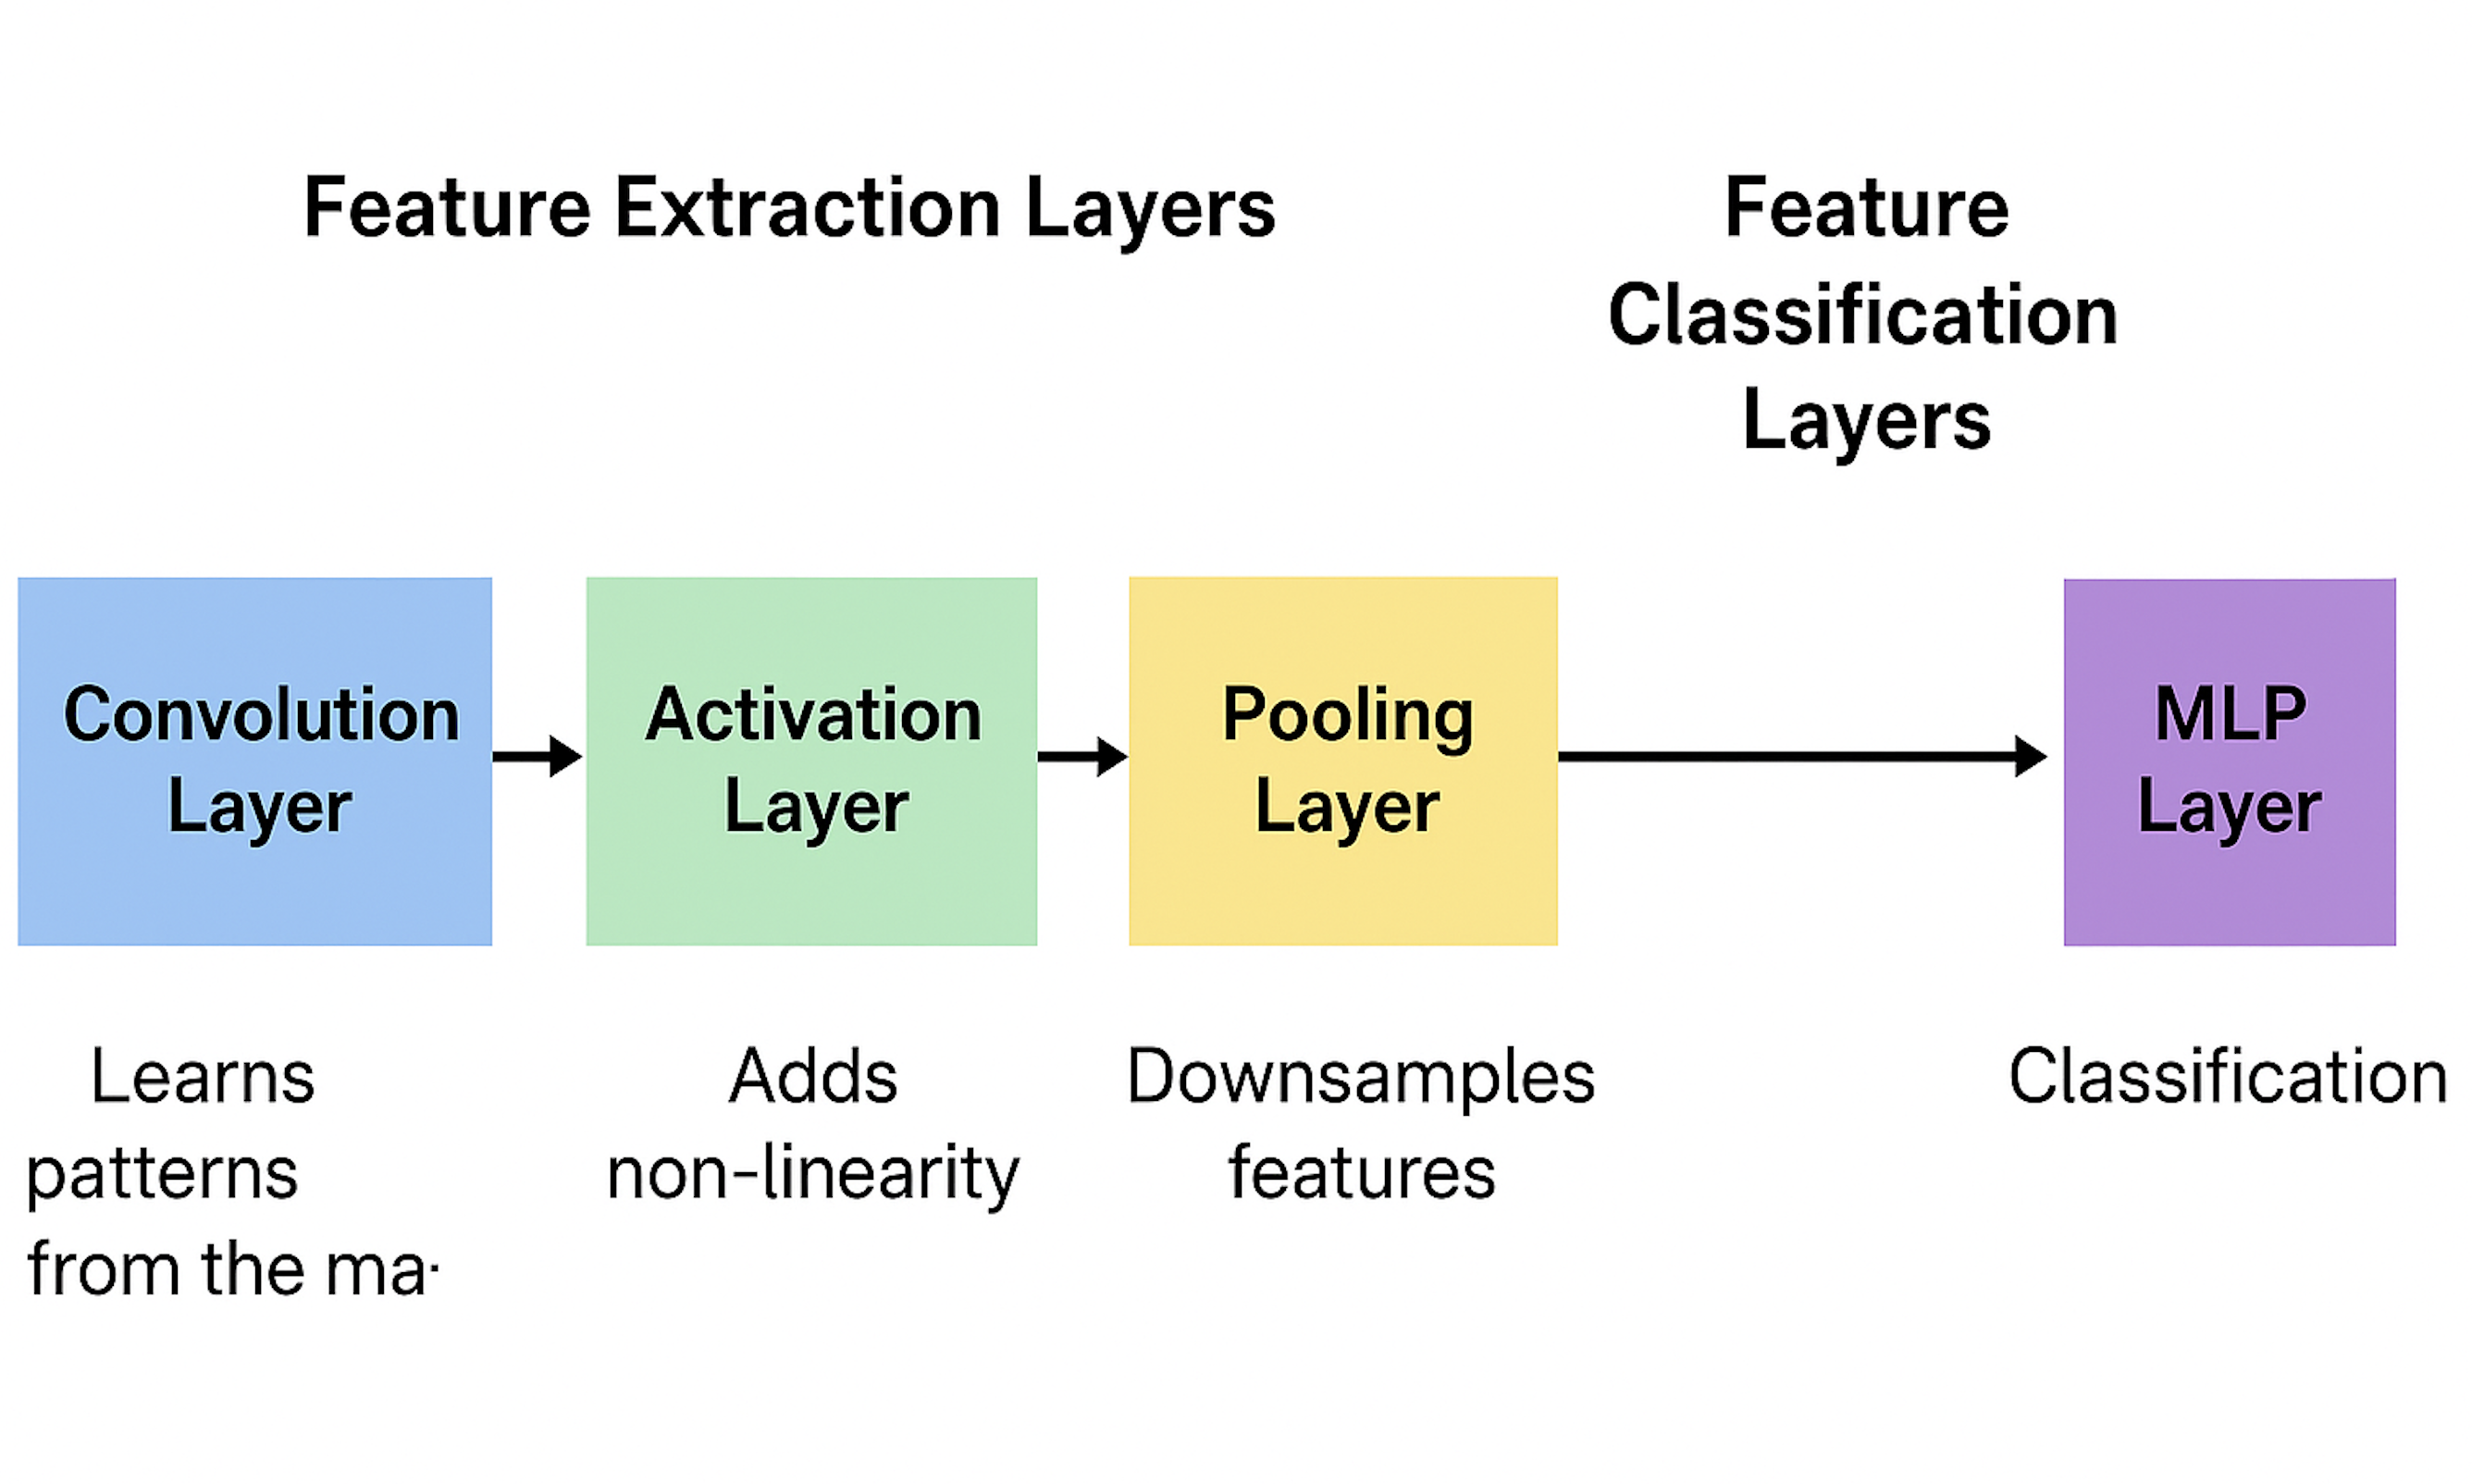


Why MLPs do not work with Vision related problems

- MLPs are fully connected and need 1d vecrtor as input, hence image pixes loose the spatial information after converting image into 1d vector pixels.

- In contrast - Convolution layer of CNN works well to extract image feature as Kernel Filter slides over input image and extract the important feature of the image while retaining spatial info of the image and converts the image into output matrix



## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

train_data = datasets.MNIST(root="data",
                            train=True,
                            transform=ToTensor(),
                            target_transform=None,
                            download=True)

test_data = datasets.MNIST(root="data",
                           train=False,
                           transform=ToTensor(),
                           target_transform=None,
                           download=True)

In [ ]:
class_name = train_data.classes
class_name

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [ ]:
len(train_data)
data_class = train_data.classes
image = train_data.data
label =train_data.targets
print(f"data class after downloading the data : {data_class}")
print(f"shape of the image : {image.shape}")
print(f"shape of the label : {label.shape}")
#image[0].unsqueeze(dim=0).shape



data class after downloading the data : ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
shape of the image : torch.Size([60000, 28, 28])
shape of the label : torch.Size([60000])


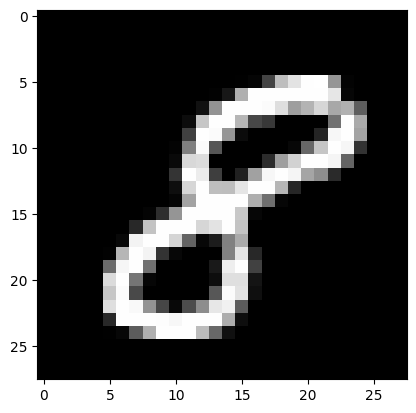

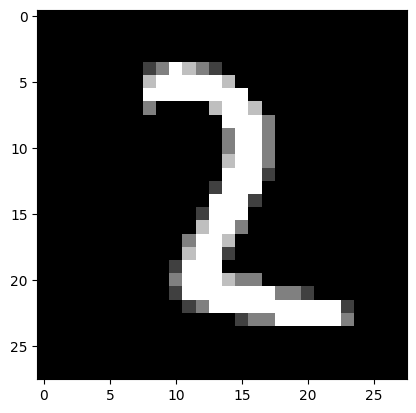

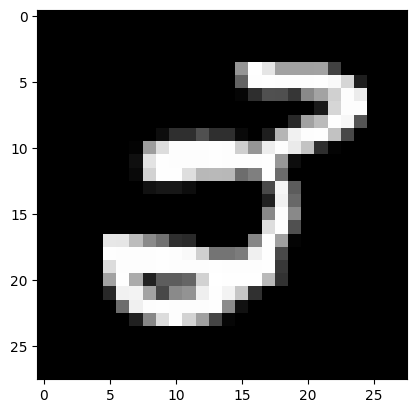

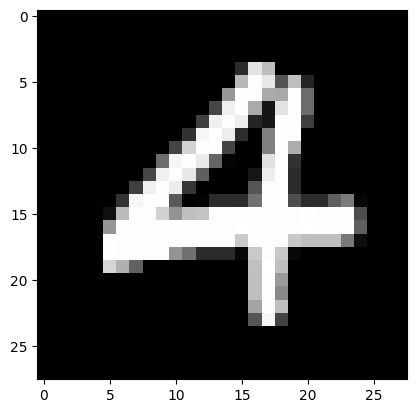

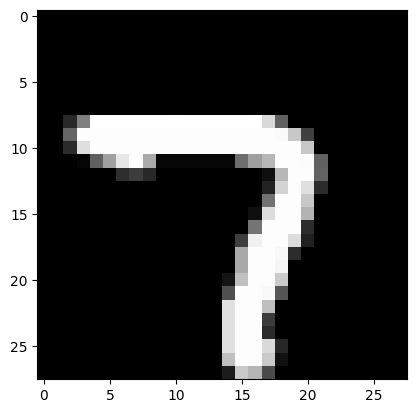

In [ ]:
import matplotlib.pyplot as plt
import random
plt.imshow(image[0], cmap='gray')
for i in range(5):
  plt.imshow(image[random.randint(1,60000)], cmap='gray')
  plt.show()

## 6. Visualize at least 5 different samples of the MNIST training dataset.

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

length of training batch : 1875
Batch 0: torch.Size([32, 1, 28, 28])
lets see 0 th index : torch.Size([1, 28, 28])
Batch 1: torch.Size([32, 1, 28, 28])
lets see 0 th index : torch.Size([1, 28, 28])
Batch 2: torch.Size([32, 1, 28, 28])
lets see 0 th index : torch.Size([1, 28, 28])


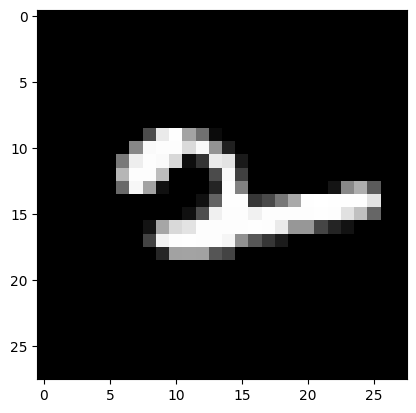

In [ ]:
from matplotlib import cm
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
#plt.imshow(image[0], cmap='gray')


train_batch =  DataLoader(train_data,
                          batch_size=32,
                          shuffle=True)
test_batch = DataLoader(test_data,
                        batch_size=32,
                        shuffle=False)
print(f"length of training batch : {len(train_batch)}")


for batch_idx, batch in enumerate(train_batch):
    train_features_batch, train_labels_batch = batch
    print(f"Batch {batch_idx}: {train_features_batch.shape}")
    print(f"lets see 0 th index : {train_features_batch[31].shape}")
    plt.imshow(train_features_batch[31].squeeze(), cmap='gray')
    if batch_idx >= 2:  # Stop after 5th batch (idx 0-4)
        break



## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
from torch.nn.modules.conv import Conv2d
import torch
from torch import nn
import torchvision

class model_2_mnist (nn.Module):
  def __init__ (self,input_shape : int, hidden_layer_feature : int, output_features : int):
    super().__init__()
    self.feature_extraction_layer_1 = nn.Sequential(
         nn.Conv2d(input_shape, 20, 3),
         nn.ReLU(),
         nn.MaxPool2d(2))
    self.classfication_extraction_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(3380,output_features))
  def forward(self, x: torch.tensor) :
    x = self.feature_extraction_layer_1(x)
    x = self.classfication_extraction_layer(x)
    return x

model_2 = model_2_mnist(1,20,len(data_class))
model_2.to(device)  #

model_2_mnist(
  (feature_extraction_layer_1): Sequential(
    (0): Conv2d(1, 20, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classfication_extraction_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3380, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)


def train_model (model, dataLoader, loss_fn, optimizer, device):
    model.train()
    train_loss = 0
    for batch_idx, (X,y) in enumerate(dataLoader):
        X,y = X.to(device), y.to(device)
        optimizer.zero_grad()
        y_pred = model(X)

        loss = loss_fn(y_pred,y)
        train_loss += loss.item()

        loss.backward()
        optimizer.step()

    train_loss /= len(dataLoader)
    print(f"train loss : {train_loss}")






def test_model (model, dataLoader, loss_fn, device):
    model.eval()
    test_loss = 0
    with torch.inference_mode():
        for batch_idx, (X,y) in enumerate(dataLoader):
            X,y = X.to(device), y.to(device)
            y_pred = model(X)
            loss = loss_fn(y_pred,y)
            test_loss += loss.item()
    test_loss /= len(dataLoader)
    print(f"test loss : {test_loss}")
print(f"Using device: {device}")


epoch = 3
for epoch in range(epoch):
    train_model(model=model_2, dataLoader=train_batch, loss_fn=loss_fn, optimizer=optimizer,device="cuda")
    test_model(model=model_2,dataLoader=test_batch,loss_fn=loss_fn,device="cuda")






Using device: cuda
train loss : 0.04154194389746214
test loss : 0.05389816481677723
train loss : 0.0382794293881394
test loss : 0.05088515669908397
train loss : 0.03499493858906596
test loss : 0.05034490996224511


test loss : 0.05329399269644004


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [ ]:


for idx_batch, (X,y) in enumerate(test_batch):
    X,y = X.to(device), y.to(device)
    y_pred = model_2(X)
    print(f"First Logits Y : {y_pred[0]}")
    y_pred_class = torch.argmax(y_pred,dim=1)
    print(f"prediction : {y_pred_class}")
    print(f"label : {y}")
    print(f"Test sample image shape: {y[0].shape}\nTest sample label: {y[0]} ({class_name[y[0]]})")
    if batch_idx >= 2:  # Stop after 5th batch (idx 0-4)
        break

First Logits Y : tensor([ -1.9771,  -2.0391,   1.4171,   5.7227,  -4.3873,  -4.8811, -11.6941,
         16.0899,   0.7467,   1.5378], device='cuda:0',
       grad_fn=<SelectBackward0>)
prediction : tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1], device='cuda:0')
label : tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1], device='cuda:0')
Test sample image shape: torch.Size([])
Test sample label: 7 (7 - seven)


In [ ]:
#pip install torchviz
# Install hiddenlayer using pip with the '!' prefix
!pip install hiddenlayer -q

# Install the GraphViz Python wrapper (required for visualization)
!pip install graphviz -q


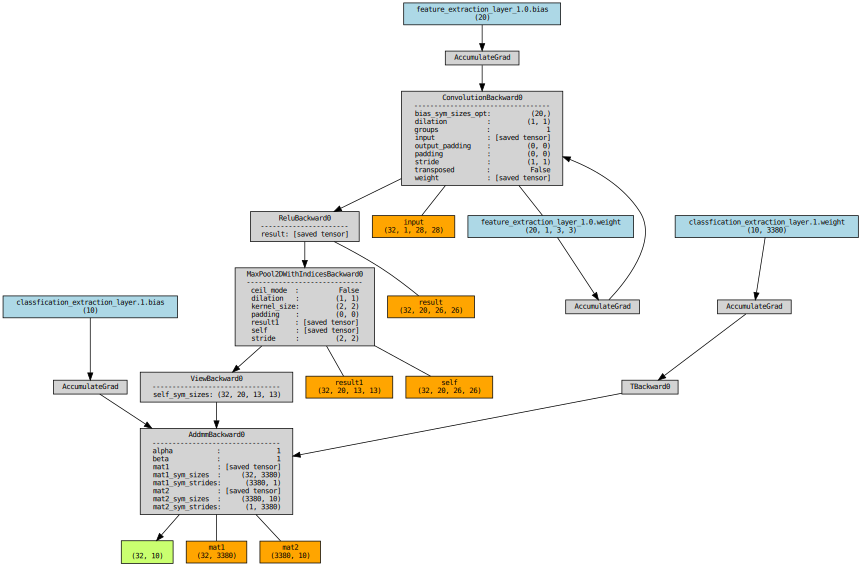

In [ ]:
# visualize model

from torchviz import make_dot
make_dot(y_pred, params=dict(model_2.named_parameters()), show_attrs=True, show_saved=True)
#model_2


## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [ ]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 23.4 MB/s eta 0:00:00
mlxtend version: 0.23.4


In [ ]:

# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.4


In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_name))
confmat_tensor = confmat(preds=y_pred,
                         target=y.targets)


TypeError: ConfusionMatrix.__new__() missing 1 required positional argument: 'task'

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?